# 📊 Heart Disease Prediction - End-to-End Machine Learning Workflow

This notebook presents a complete **end-to-end machine learning pipeline** for predicting heart disease using the **Heart Disease dataset**. The workflow covers **data preprocessing, model training (baseline & tuned), evaluation, comparison, ranking, and visualization**. Below is a detailed breakdown of the steps:



##  1. Data Preprocessing
- Imported dataset (`heart.csv`) and explored its shape and missing values.
- **Categorical Encoding:** Converted categorical features such as `Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina`, and `ST_Slope` using **Label Encoding**.
- **Feature Scaling:** Standardized numerical features (`Age`, `RestingBP`, `Cholesterol`, `MaxHR`, `Oldpeak`) using **StandardScaler**.
- Defined **features (X)** and **target variable (y)**.
- Performed **train-test split** (80-20) with **stratification** for balanced classes.



##  2. Logistic Regression (Baseline)
- Built a **Logistic Regression model** with default parameters.
- Generated predictions and evaluated with:
  - Accuracy, Precision, Recall, F1 Score, ROC-AUC.
  - Classification Report.
  - Confusion Matrix.



##  3. Random Forest
- **Baseline Random Forest**:
  - Trained with default parameters.
  - Evaluated using Accuracy, Precision, Recall, F1 Score, ROC-AUC.
- **Tuned Random Forest**:
  - Applied **RandomizedSearchCV** for hyperparameter tuning.
  - Selected best parameters and re-trained the model.
  - Compared performance of **baseline vs tuned** models.



##  4. XGBoost
- **Baseline XGBoost**:
  - Implemented with default parameters (`eval_metric=logloss`).
  - Evaluated with multiple metrics and classification report.
- **Tuned XGBoost**:
  - Performed **RandomizedSearchCV** over hyperparameters (n_estimators, max_depth, learning_rate, subsample, etc.).
  - Selected best parameters and evaluated again.
  - Stored probability predictions for **ROC Curve & Precision-Recall Curve**.



##  5. CatBoost
- **Baseline CatBoost**:
  - Trained using default parameters.
  - Evaluated using classification metrics.
- **Tuned CatBoost**:
  - Applied **RandomizedSearchCV** for parameter tuning (iterations, depth, learning_rate, l2_leaf_reg, border_count).
  - Compared tuned vs baseline performance.



##  6. Model Comparison & Ranking
- Compiled results for **Logistic Regression, Random Forest, XGBoost, and CatBoost (baseline vs tuned)** into a single dataframe.
- Compared models on:
  - Accuracy
  - Precision
  - Recall
  - F1 Score
  - ROC-AUC
- Ranked models using **Accuracy, F1 Score, and ROC-AUC**.
- Identified the **Best Model (XGBoost Tuned)**.



##  7. Visualizations (Best Model - XGBoost Tuned)
- **Confusion Matrix Heatmap** (visualizing classification performance).
- **ROC Curve with AUC Score** (tradeoff between sensitivity & specificity).
- **Precision-Recall Curve** (focus on imbalanced classification performance).
- **Feature Importance Plot** (interpreting which features impact predictions most).



##  8. Final Output
- Created a **submission.csv** file containing predictions from the best model (XGBoost Tuned).



## ✅ Key Takeaways
- Applied **multiple ML algorithms** (Logistic Regression, Random Forest, XGBoost, CatBoost).
- Used **hyperparameter tuning** to improve model performance.
- Compared all models using multiple evaluation metrics.
- Applied **professional visualizations** to interpret model results.
- Selected **XGBoost Tuned** as the final best-performing model.
- Exported predictions into a structured CSV file.



## Load Dataset

In [1]:
#importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from scipy.stats import uniform
from sklearn.decomposition import PCA
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve


#print first 2 columns
df = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
print(df.head(5))

#find missing values
print(df.isnull().sum())

print(df.shape)



   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slop

## Data Cleaning and Preprocessing

In [2]:
# Encode categorical columns
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Scale numerical features
scaler = StandardScaler()
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Features (X) and Target (y)
X = df.drop(columns=['HeartDisease'])   # all except target
y = df['HeartDisease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Preprocessing Completed")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Preprocessing Completed
X_train shape: (734, 11)
X_test shape: (184, 11)


## Logistic Regression (Baseline) Predictions

In [3]:

# Default parameters Logisctic Regression
reg_baseline = LogisticRegression()

# Training
reg_baseline.fit(X_train, y_train)

# Predictions
reg_baseline_pred = reg_baseline.predict(X_test)

# Results
print("=============== Logistic Regression (Baseline) =================")
print("Baseline Logistic Regression (first 10):", reg_baseline_pred[:10])
lg_acc=accuracy_score(y_test, reg_baseline_pred)
print("✅ Accuracy: ",lg_acc)

print("\n📑 Classification Report:\n", classification_report(y_test, reg_baseline_pred))

cm = confusion_matrix(y_test.replace(-1, 0), reg_baseline_pred)
print("\n Confusion Matrix:\n", cm)

# Extra metrics separately
lg_precision = precision_score(y_test, reg_baseline_pred)
lg_recall = recall_score(y_test, reg_baseline_pred)
lg_f1 = f1_score(y_test, reg_baseline_pred)
lg_roc_auc = roc_auc_score(y_test, reg_baseline_pred)

print("\n📊 Evaluation Metrics:")
print("Precision:", lg_precision)
print("Recall:", lg_recall)
print("F1 Score:", lg_f1)
print("ROC AUC Score:", lg_roc_auc)

=============== Logistic Regression (Baseline) =================
Baseline Logistic Regression (first 10): [1 0 1 1 0 1 0 1 0 1]
✅ Accuracy:  0.8695652173913043

📑 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        82
           1       0.85      0.93      0.89       102

    accuracy                           0.87       184
   macro avg       0.88      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184


 Confusion Matrix:
 [[65 17]
 [ 7 95]]

📊 Evaluation Metrics:
Precision: 0.8482142857142857
Recall: 0.9313725490196079
F1 Score: 0.8878504672897195
ROC AUC Score: 0.8620277379244381


## Random Forest Model (Baseline) Predictions

In [4]:
# Simple Random Forest Model
rf = RandomForestClassifier()

# Training
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
print("===============RANDOM FOREST MODEL (Baseline)=================")
print("Random Forest Predictions (first 10):", y_pred_rf[:10])

# Evaluation
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_cr = classification_report(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)

print("✅ Accuracy:", rf_acc)
print("\n📑 Classification Report:\n", rf_cr)
print("\n Confusion Matrix:\n", rf_cm)

# Extra metrics separately
# Store metrics
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
print("\n📊 Evaluation Metrics (separately):")
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("ROC AUC Score:", rf_roc_auc)

===============RANDOM FOREST MODEL (Baseline)=================
Random Forest Predictions (first 10): [1 0 1 1 0 0 0 1 0 1]
✅ Accuracy: 0.8913043478260869

📑 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184


 Confusion Matrix:
 [[71 11]
 [ 9 93]]

📊 Evaluation Metrics (separately):
Precision: 0.8942307692307693
Recall: 0.9117647058823529
F1 Score: 0.9029126213592232
ROC AUC Score: 0.8888091822094691


## Hyperparameter Tuning Random Forest (Baseline) Model through RandomizedSearchCV

In [5]:
rf_tuned=RandomForestClassifier(random_state=42)
rf_param_dist={
    "max_depth": [2,3,4,5, None],        
    "min_samples_split": [ 3, 4, 5, 6],    
    "min_samples_leaf": [1, 2, 3, 4], 
    'max_features': ['sqrt','log2',None]

}
rf_random_search=RandomizedSearchCV(
    estimator=rf_tuned,
    param_distributions=rf_param_dist,
    cv=3,
    n_iter=10,
    n_jobs=-1,
    random_state=42
)
#fitting Random forest model
rf_random_search.fit(X_train, y_train)
print("===============Random forest MODEL (Tuned) Predictions=================")
print("Best Parameters on Random forest: ",rf_random_search.best_params_)
best_xgb_model = rf_random_search.best_estimator_

#predictions Random forestmodel
y_pred_rf = best_xgb_model.predict(X_test)
print("===================================")
print(" Predictions: ", y_pred_rf[:10])
rf_acc1=accuracy_score(y_test,y_pred_rf)
rf_cr1=classification_report(y_test,y_pred_rf)
rf_cm1=confusion_matrix(y_test,y_pred_rf)


rf_precision1 = precision_score(y_test, y_pred_rf)
rf_recall1 = recall_score(y_test, y_pred_rf)
rf_f1_1 = f1_score(y_test, y_pred_rf)
rf_roc_auc1 = roc_auc_score(y_test, y_pred_rf)


#model evaluation 
print("=============MODEL Random Forest Evalution (RandomSearchCV)================")
print("✅ Accuracy:", rf_acc1)
print("\n📑 Classification Report:\n", rf_cr1)
print("\n Confusion Matrix: \n", rf_cm1)
print("\n📊 Evaluation Metrics:")
print("Precision:", rf_precision1)
print("Recall:", rf_recall1)
print("F1 Score:", rf_f1_1)
print("ROC AUC Score:", rf_roc_auc1)

===============Random forest MODEL (Tuned) Predictions=================
Best Parameters on Random forest:  {'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 4}
 Predictions:  [1 0 1 1 0 0 0 1 0 1]
=============MODEL Random Forest Evalution (RandomSearchCV)================
✅ Accuracy: 0.8695652173913043

📑 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.85        82
           1       0.85      0.92      0.89       102

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184


 Confusion Matrix: 
 [[66 16]
 [ 8 94]]

📊 Evaluation Metrics:
Precision: 0.8545454545454545
Recall: 0.9215686274509803
F1 Score: 0.8867924528301887
ROC AUC Score: 0.8632233381157342


## Comparison Table between Random Forest (Baseline) & Tuned

In [8]:


# Create metrics table for model comparison
metrics_df = pd.DataFrame([
    {
        'Model': 'Random Forest (Baseline)',
        'Accuracy': rf_acc,
        'Precision': rf_precision,
        'Recall': rf_recall,
        'F1': rf_f1,
        'Roc auc score': rf_roc_auc
    },
    {
        'Model': 'Random Forest (RandomizedSearchCV)',
        'Accuracy': rf_acc1,
        'Precision': rf_precision1,  
        'Recall': rf_recall1,
        'F1': rf_f1_1,
        'Roc auc score': rf_roc_auc1 
    }
])

print("\n===== Model Comparison =====")
print(metrics_df)

# Final model note (automatic selection)
print("\n Final Model Selection")
if rf_acc >= rf_acc1:
    print("Random Forest (Baseline) is selected as the final model because it achieved better performance.")
else:
    print("Random Forest (RandomizedSearchCV) is selected as the final model because it achieved better performance and is faster to train.")


===== Model Comparison =====
                                Model  Accuracy  Precision    Recall  \
0            Random Forest (Baseline)  0.891304   0.894231  0.911765   
1  Random Forest (RandomizedSearchCV)  0.869565   0.854545  0.921569   

         F1  Roc auc score  
0  0.902913       0.888809  
1  0.886792       0.863223  

 Final Model Selection
Random Forest (Baseline) is selected as the final model because it achieved better performance.


## Xgboost (Baseline) Predictions

In [9]:
# XGBoost (Baseline) 
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predictions
xgb_pred = xgb.predict(X_test)

# Metrics
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_cm = confusion_matrix(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_pred)
xgb_cr=classification_report(y_test,xgb_pred)

# Print
print("\n=============== XGBOOST (Baseline) =================")
print("Predictions (first 10):", xgb_pred[:10])
print("✅ Accuracy:", xgb_acc)
print("\n Confusion Matrix:\n", xgb_cm)
print("\nClassification Report: ",xgb_cr)

print("\n📊 Evaluation Metrics:")
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)
print("ROC AUC Score:", xgb_roc_auc)



=============== XGBOOST (Baseline) =================
Predictions (first 10): [1 0 1 0 0 0 0 1 0 1]
✅ Accuracy: 0.875

 Confusion Matrix:
 [[71 11]
 [12 90]]

Classification Report:                precision    recall  f1-score   support

           0       0.86      0.87      0.86        82
           1       0.89      0.88      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184


📊 Evaluation Metrics:
Precision: 0.8910891089108911
Recall: 0.8823529411764706
F1 Score: 0.8866995073891626
ROC AUC Score: 0.874103299856528


## Hyperparmeter Tuning through RandomizedSearchCV on Xgboost & Predictions

In [10]:
xgb=XGBClassifier(random_state=42)
xgb_param_dist={
    "n_estimators":[100,200,500],
    "max_depth": [3,5,7,10],
    "learning_rate":[0.01,0.05,0.1,0.3],
    "subsample":[0.6,0.8,1.0],
    "colsample_bytree":[0.6,0.8,1.0],
    "gamma":[0,1,5]
}
xgb_random_search=RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_dist,
    cv=5,
    n_iter=10,
    n_jobs=-1,
    random_state=42
)

# fitting xgboost model
xgb_random_search.fit(X_train, y_train)
print("===============XGBoost MODEL=================")
print("Best Parameters on XgBoost: ",xgb_random_search.best_params_)
best_xgb_model = xgb_random_search.best_estimator_

# predictions xgboost model
y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:,1]  # for ROC-AUC

print("===================================")
print("Xgboost (Tuned) Predictions: ", y_pred_xgb[:10])
xgb_acc1=accuracy_score(y_test,y_pred_xgb)
xgb_cr1=classification_report(y_test,y_pred_xgb)
xgb_cm1=confusion_matrix(y_test,y_pred_xgb)

# new metrics
xgb_f11 = f1_score(y_test, y_pred_xgb)
xgb_precision1 = precision_score(y_test, y_pred_xgb)
xgb_recall1 = recall_score(y_test, y_pred_xgb)
xgb_roc1 = roc_auc_score(y_test, y_pred_proba_xgb)

# model evaluation 
print("=============MODEL EVALUATION (RandomSearchCV)================")
print("✅ Accuracy:", xgb_acc1)
print("🎯 F1 Score:", xgb_f11)
print("🎯 Precision:", xgb_precision1)
print("🎯 Recall:", xgb_recall1)
print("🎯 ROC-AUC:", xgb_roc1)
print("\n📑 Classification Report:\n", xgb_cr1)
print("\n Confusion Matrix: \n", xgb_cm1)

===============XGBoost MODEL=================
Best Parameters on XgBoost:  {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 1.0}
Xgboost (Tuned) Predictions:  [1 0 1 1 0 0 0 1 0 1]
=============MODEL EVALUATION (RandomSearchCV)================
✅ Accuracy: 0.9130434782608695
🎯 F1 Score: 0.9223300970873786
🎯 Precision: 0.9134615384615384
🎯 Recall: 0.9313725490196079
🎯 ROC-AUC: 0.9312529890004781

📑 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        82
           1       0.91      0.93      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184


 Confusion Matrix: 
 [[73  9]
 [ 7 95]]


## CatBoost Model (Tuned) Predictions

In [11]:

# Simple CatBoost baseline model
cat_baseline = CatBoostClassifier(verbose=0, random_state=42)

# Training
cat_baseline.fit(X_train, y_train)

# Predictions
y_pred_cat_base = cat_baseline.predict(X_test)
print("=============== CatBoost (Baseline) ===============")
print("CatBoost Predictions (first 10):", y_pred_cat_base[:10])

# Evaluation
cat_acc_base = accuracy_score(y_test, y_pred_cat_base)
cat_cr_base = classification_report(y_test, y_pred_cat_base)
cat_cm_base = confusion_matrix(y_test, y_pred_cat_base)

print("✅ Accuracy:", cat_acc_base)
print("\n📑 Classification Report:\n", cat_cr_base)
print("\n Confusion Matrix:\n", cat_cm_base)

# Extra metrics separately
cat_precision_base = precision_score(y_test, y_pred_cat_base)
cat_recall_base = recall_score(y_test, y_pred_cat_base)
cat_f1_base = f1_score(y_test, y_pred_cat_base)
cat_roc_auc_base = roc_auc_score(y_test, y_pred_cat_base)

print("\n📊 Evaluation Metrics (separately):")
print("Precision:", cat_precision_base)
print("Recall:", cat_recall_base)
print("F1 Score:", cat_f1_base)
print("ROC AUC Score:", cat_roc_auc_base)

=============== CatBoost (Baseline) ===============
CatBoost Predictions (first 10): [1 0 1 1 0 0 0 1 0 1]
✅ Accuracy: 0.9021739130434783

📑 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        82
           1       0.91      0.91      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184


 Confusion Matrix:
 [[73  9]
 [ 9 93]]

📊 Evaluation Metrics (separately):
Precision: 0.9117647058823529
Recall: 0.9117647058823529
F1 Score: 0.9117647058823528
ROC AUC Score: 0.9010043041606887


## CatBoost Model (Baseline) Predictions

In [12]:

cat = CatBoostClassifier(verbose=0, random_state=42)

# Hyperparameter search space
cat_param_dist = {
    "iterations": [200, 500, 800],
    "depth": [4, 6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.3],
    "l2_leaf_reg": [1, 3, 5, 7, 9],
    "border_count": [32, 64, 128]
}

# RandomizedSearchCV for CatBoost
cat_random_search = RandomizedSearchCV(
    estimator=cat,
    param_distributions=cat_param_dist,
    cv=5,
    n_iter=10,
    n_jobs=-1,
    random_state=42
)

# Training
cat_random_search.fit(X_train, y_train)

print("===============CatBoost MODEL=================")
print("Best Parameters on CatBoost: ", cat_random_search.best_params_)
best_cat_model = cat_random_search.best_estimator_

# Predictions
y_pred_cat = best_cat_model.predict(X_test)
print("===================================")
print("CatBoost (Tuned) Predictions: ", y_pred_cat[:10])

# Evaluation
cat_acc = accuracy_score(y_test, y_pred_cat)
cat_cr = classification_report(y_test, y_pred_cat)
cat_cm = confusion_matrix(y_test, y_pred_cat)

print("=============MODEL EVALUATION (RandomSearchCV)================")
print("✅ Accuracy:", cat_acc)
print("\n📑 Classification Report:\n", cat_cr)
print("\n Confusion Matrix: \n", cat_cm)

# Extra metrics separately
cat_precision = precision_score(y_test, y_pred_cat)
cat_recall = recall_score(y_test, y_pred_cat)
cat_f1 = f1_score(y_test, y_pred_cat)
cat_roc_auc = roc_auc_score(y_test, y_pred_cat)

print("\n📊 Evaluation Metrics (separately):")
print("Precision:", cat_precision)
print("Recall:", cat_recall)
print("F1 Score:", cat_f1)
print("ROC AUC Score:", cat_roc_auc)

===============CatBoost MODEL=================
Best Parameters on CatBoost:  {'learning_rate': 0.01, 'l2_leaf_reg': 1, 'iterations': 800, 'depth': 6, 'border_count': 64}
CatBoost (Tuned) Predictions:  [1 0 1 1 0 0 0 1 0 1]
=============MODEL EVALUATION (RandomSearchCV)================
✅ Accuracy: 0.8913043478260869

📑 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        82
           1       0.90      0.90      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184


 Confusion Matrix: 
 [[72 10]
 [10 92]]

📊 Evaluation Metrics (separately):
Precision: 0.9019607843137255
Recall: 0.9019607843137255
F1 Score: 0.9019607843137255
ROC AUC Score: 0.8900047824007652


## Comparison between Models to decide which performs best 

In [13]:
# Comparing Results of Logistic Regression, RF, XGBoost, CatBoost (Baseline vs Tuned)
results = pd.DataFrame({
    "Model": [
        "Logistic Regression (Baseline)",
        "CatBoost (Baseline)", 
        "CatBoost (Tuned)",
        "Random Forest (Baseline)",
        "Random Forest (Tuned)",
        "XGBoost (Baseline)",
        "XGBoost (Tuned)"
    ],
    "Accuracy": [
        lg_acc, cat_acc_base, cat_acc, rf_acc, rf_acc1, xgb_acc, xgb_acc1
    ],
    "Precision": [
        lg_precision, cat_precision_base, cat_precision, rf_precision, rf_precision1, xgb_precision, xgb_precision1
    ],
    "Recall":[
        lg_recall, cat_recall_base, cat_recall, rf_recall, rf_recall1, xgb_recall, xgb_recall1
    ],
    "F1_score": [
        lg_f1, cat_f1_base, cat_f1, rf_f1, rf_f1_1, xgb_f1, xgb_f11
    ],
    "ROC_AUC":[
       lg_roc_auc,cat_roc_auc_base,cat_roc_auc,rf_roc_auc,rf_roc_auc1,xgb_roc_auc,xgb_roc1
    ]
})

print("============== 📊 Model Comparison Table ==============")
print(results.to_string())

# ===================== 🥇 Ranking Models =====================
# Rank based on Accuracy, F1 Score, and ROC-AUC
results["Acc_Rank"] = results["Accuracy"].rank(ascending=False)
results["F1_Rank"] = results["F1_score"].rank(ascending=False)
results["ROC_AUC_Rank"] = results["ROC_AUC"].rank(ascending=False)

# Calculate overall rank (lower = better)
results["Overall_Rank"] = results[["Acc_Rank","F1_Rank","ROC_AUC_Rank"]].sum(axis=1)

# Sort models by rank
results_sorted = results.sort_values("Overall_Rank")
print("\n============== 🏆 Ranked Models ==============")
print(results_sorted.to_string())

# Best model
best_model = results_sorted.iloc[0]["Model"]
print("\n🏆 Best Model Selected:", best_model)


============== 📊 Model Comparison Table ==============
                            Model  Accuracy  Precision    Recall  F1_score   ROC_AUC
0  Logistic Regression (Baseline)  0.869565   0.848214  0.931373  0.887850  0.862028
1             CatBoost (Baseline)  0.902174   0.911765  0.911765  0.911765  0.901004
2                CatBoost (Tuned)  0.891304   0.901961  0.901961  0.901961  0.890005
3        Random Forest (Baseline)  0.891304   0.894231  0.911765  0.902913  0.888809
4           Random Forest (Tuned)  0.869565   0.854545  0.921569  0.886792  0.863223
5              XGBoost (Baseline)  0.875000   0.891089  0.882353  0.886700  0.874103
6                 XGBoost (Tuned)  0.913043   0.913462  0.931373  0.922330  0.931253

============== 🏆 Ranked Models ==============
                            Model  Accuracy  Precision    Recall  F1_score   ROC_AUC  Acc_Rank  F1_Rank  ROC_AUC_Rank  Overall_Rank
6                 XGBoost (Tuned)  0.913043   0.913462  0.931373  0.922330  0.931253  

## Visualizations for (Xgboost tuned)

## Confusion Matrix heatmap for Best Model (Xgboost tuned)

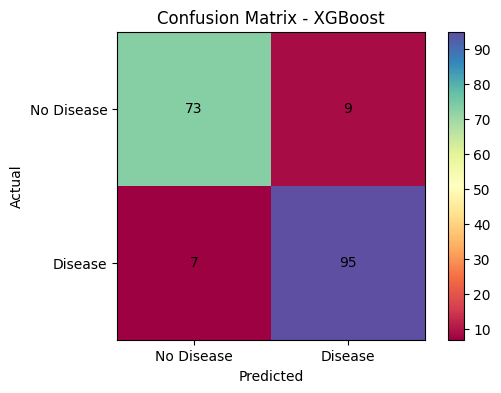

In [14]:
# 1. Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
plt.imshow(xgb_cm1, cmap="Spectral")
plt.title("Confusion Matrix - XGBoost")
plt.colorbar()
classes = ["No Disease", "Disease"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i in range(xgb_cm1.shape[0]):
    for j in range(xgb_cm1.shape[1]):
        plt.text(j, i, str(xgb_cm1[i, j]), ha="center", va="center", color="black")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## ROC Curve with AUC Score

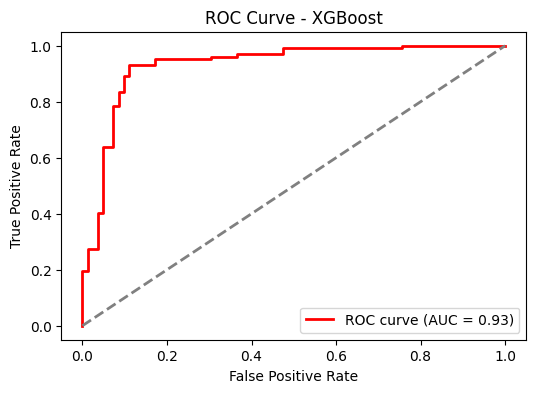

In [15]:
# 2. ROC Curve with AUC Score
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="red", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="grey", lw=2, linestyle="--")
plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

## Feature Importance

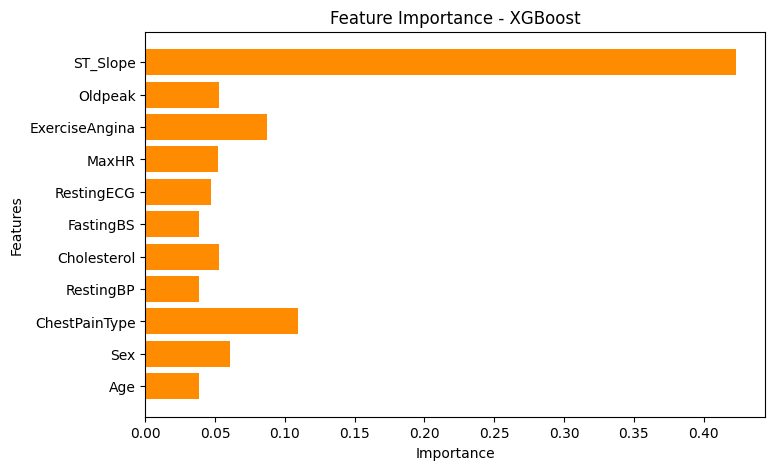

In [16]:
importances = best_xgb_model.feature_importances_
features = list(X_train.columns)

plt.figure(figsize=(8,5))
plt.barh(features, importances, color="darkorange")
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

## Precision-Recall Curve

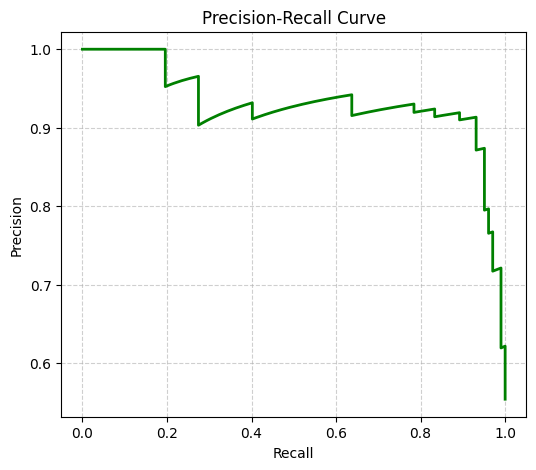

In [17]:

# Calculate precision and recall for different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba_xgb)

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 5))
plt.plot(recalls, precisions, color="green", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Create Submission.csv

In [19]:
# Create submission.csv for demonstration purposes
submission = pd.DataFrame({
    "id": X_test.index,          
    "prediction": y_pred_xgb  
})

# Save as CSV
submission.to_csv("xgb(tuned)_submission.csv", index=False)

print("✅ Submission CSV created: xgb(tuned)_submission.csv")

✅ Submission CSV created: xgb(tuned)_submission.csv
